# Capstone Project - Fang Hong


# Title of Project: Rossmann Store Sales
Kaggle link: https://www.kaggle.com/c/rossmann-store-sales

## Descriptive of the Project:
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

In their first Kaggle competition, Rossmann is challenging you to predict 6 weeks of daily sales for 1,115 stores located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. By helping Rossmann create a robust prediction model, you will help store managers stay focused on what’s most important to them: their customers and their teams! 

## Aims of the Project:
- EDA: explore the relationship among different features
- Test models with different features
- Test model fits with different features and find out which models are good

## Steps to take:
- Step 1: Import the data and examine the descriptives of variables of interest; broadly examime the relationship between sales and features.
- Step 2: Run models to predict sales with categorical data. -- Use decision tree, Train_test split and K-folds cross-valication
 - Run null model
 - Run models with categorical features using decision tree method(fixed features)
 - Run models with categorical features using train_test split and K-folds cross-validation
 - Submit model to Kaggle
- Step 3: Run linear regression model with both continous features and categorical features to predict sales and.
- Step 4: Make the submission folder and submit to website to get accuracy score.

### Step 1: Import the data and examine the descriptives of variables of interest; broadly examime the relationship between sales and features.

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from datetime import datetime as dt
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


In [382]:
# import three dataframe: test, train, store
test=pd.read_csv('test.csv')
test.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [383]:
train=pd.read_csv('train.csv')
train.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [384]:
train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [385]:
train.describe

<bound method DataFrame.describe of          Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
5            6          5  2015-07-31   5651        589     1      1   
6            7          5  2015-07-31  15344       1414     1      1   
7            8          5  2015-07-31   8492        833     1      1   
8            9          5  2015-07-31   8565        687     1      1   
9           10          5  2015-07-31   7185        681     1      1   
10          11          5  2015-07-31  10457       1236     1      1   
11          12          5  2015-07-31   8959        962     1      1   
12          13          5  2

In [386]:
store=pd.read_csv('store.csv')
store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [387]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

-- Since train and Store both have the key value store (store number); let's merge them today to have a dataframe that have all features

In [663]:
# Merge train and store dataframe
train_store=pd.merge(train, store, on='Store')
train_store.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


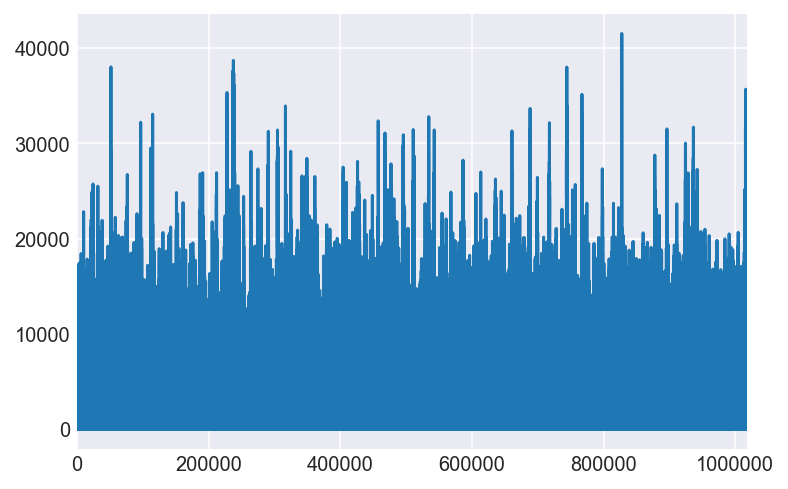

In [664]:
train_store.Sales.plot() # make a plot of target feature

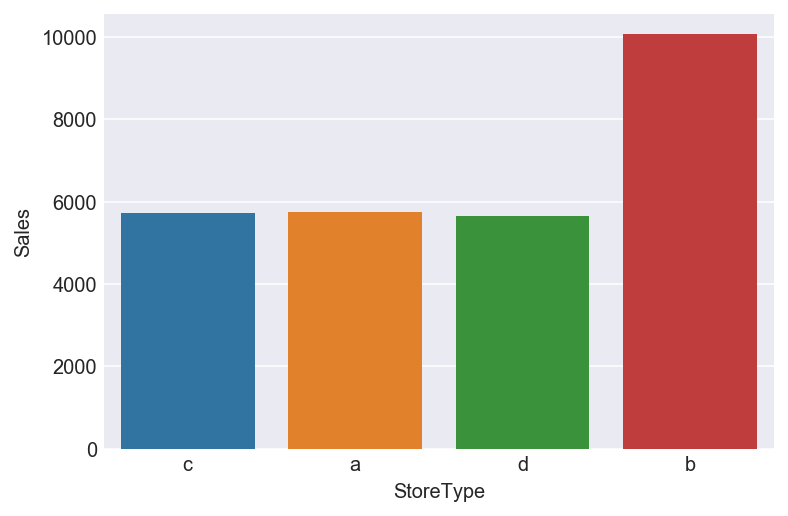

In [390]:
# Descripative of each store types
#train_store.groupby('StoreType').Sales.mean()
sns.barplot(data=train_store, x='StoreType', y='Sales', ci=None)

-Store type b is different from other types of stores.

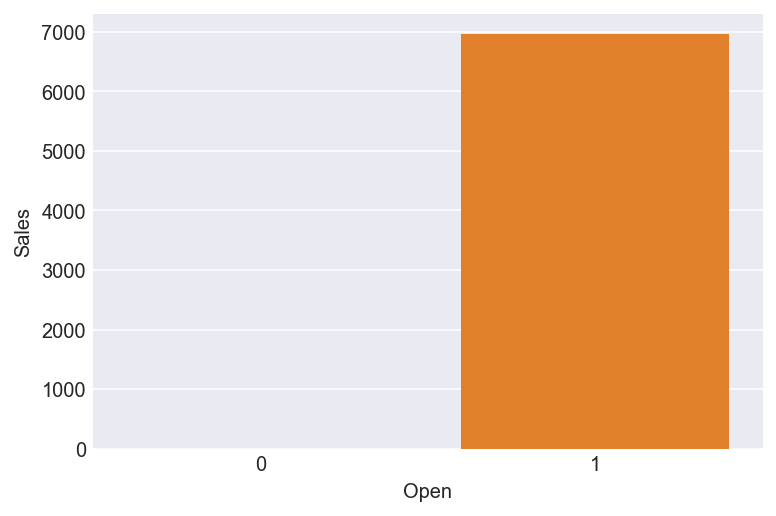

In [391]:
# Make a plot about sales: store open Vs store not open
sns.barplot(data=train, x='Open', y='Sales', ci=None)

# *****Select Just Open =1 for train_store

-- Store type b has the highest mean sales. Thus, StoreType mighe be a good figure to predict sales.

In [506]:
# Select case where store is open and use this df to run models
train_store_open=train_store[train_store.Open==1]
train_store_open.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


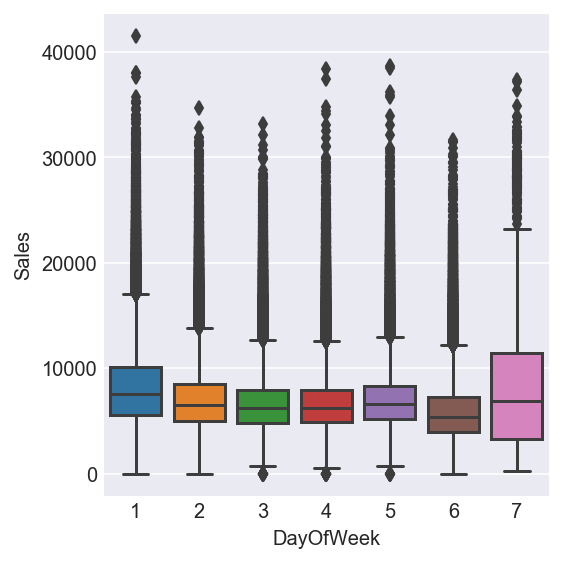

In [393]:
# Box plot for day of week
#train.boxplot(column='Sales', by='DayOfWeek') # day 7 is very different from other days
sns.factorplot(
    x='DayOfWeek',
    y='Sales',
    data=train_store_open,
    kind='box',
)

- Day 7 does not have sales. 

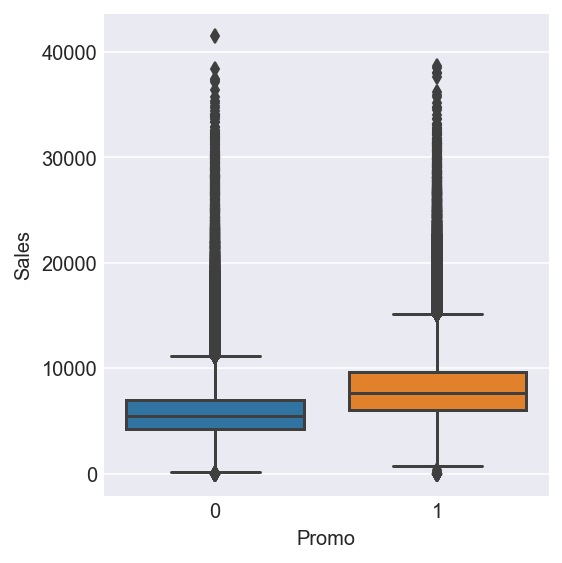

In [394]:
# Box plot for promotion or not promotion
sns.factorplot(
    x='Promo',
    y='Sales',
    data=train_store_open,
    kind='box',
)

-- whether the store has promotion or not affect the sales. Promo might be a good feature.

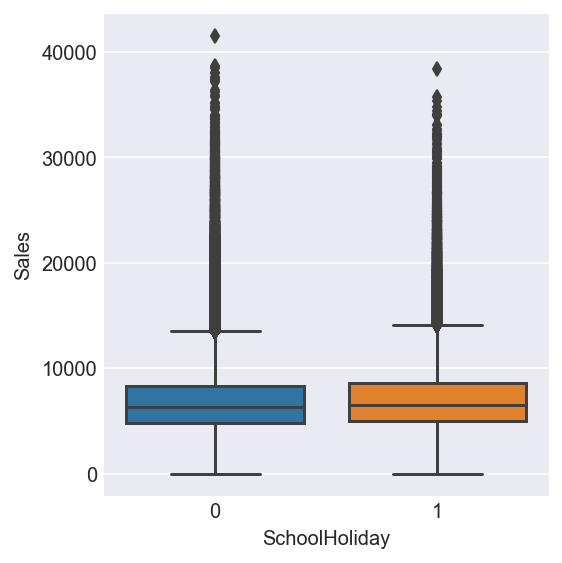

In [395]:
# Box plot for promotion or not promotion
sns.factorplot(
    x='SchoolHoliday',
    y='Sales',
    data=train_store_open,
    kind='box',
)

-- Whether the school has a holiday or not does not seem to affect sales.

In [396]:
# Examine the whether the sales affected by assorment for each types of store.
train_store_open.groupby(['StoreType', 'Assortment']).Sales.mean()

StoreType  Assortment
a          a              6537.617613
           c              7573.379923
b          a             11133.992979
           b              8639.346322
           c             17969.556263
c          a              6834.931456
           c              7037.525130
d          a              6433.619038
           c              7043.363895
Name: Sales, dtype: float64

-- Sales differ with different types of assortment. Assortment might also be a good feature.

In [397]:
# Examine the whether Day of Week impact sales for each types of score.
examine2=train_store_open.groupby(['StoreType', 'DayOfWeek']).Sales.mean()
#examine2.plot(kind='bar', figsize=(10, 8), ))

It seems people shoped less (sales is lower) on day 6 and day 7 thank other days of week. Day of Week should be a good feature.

In [398]:
# Examine whether the SchoolHoliday (school closed during this holiday) affects sales
train_store_open.groupby(['StoreType', 'SchoolHoliday']).Sales.mean()

StoreType  SchoolHoliday
a          0                 6850.968137
           1                 7232.849634
b          0                10253.616634
           1                10133.519110
c          0                 6884.647499
           1                 7128.414217
d          0                 6779.148215
           1                 7003.523384
Name: Sales, dtype: float64

-- school holiday increase sales of store type a, c, d, but decrease sales of store type b.

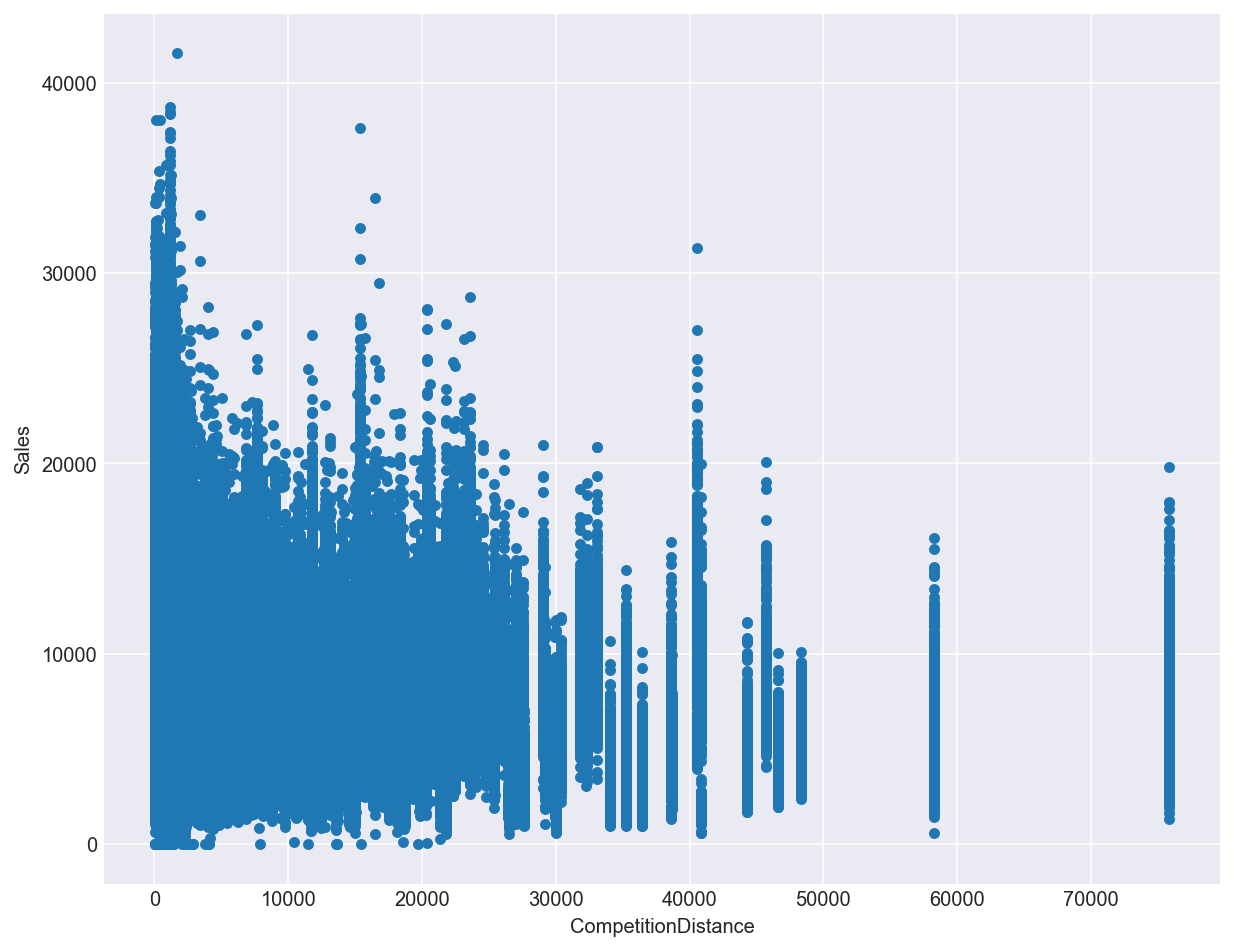

In [399]:
# Examine the association between sales and CompetitionDistance
train_store_open.plot.scatter(x='CompetitionDistance', y='Sales', legend=True, figsize=(10, 8))

--It seems the relationship is not very clear. Generally, the smaller the distance, the higher the sale. Probably because the more the stores, the more likely the locations is good and have more people/visitors.

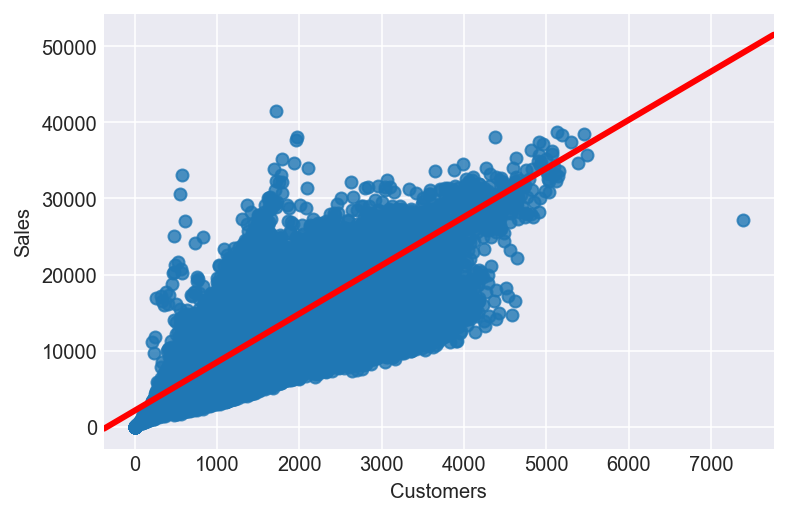

In [400]:
# Examine the association between number of customers and sales
#train_store.plot.scatter(x='Customers', y='Sales', legend=True, figsize=(10, 8))

sns.regplot('Customers','Sales', data = train_store_open, line_kws={"color":"r", "lw":3})


- However, there is no customer value in the test dataset, so we will not use it to predict sales

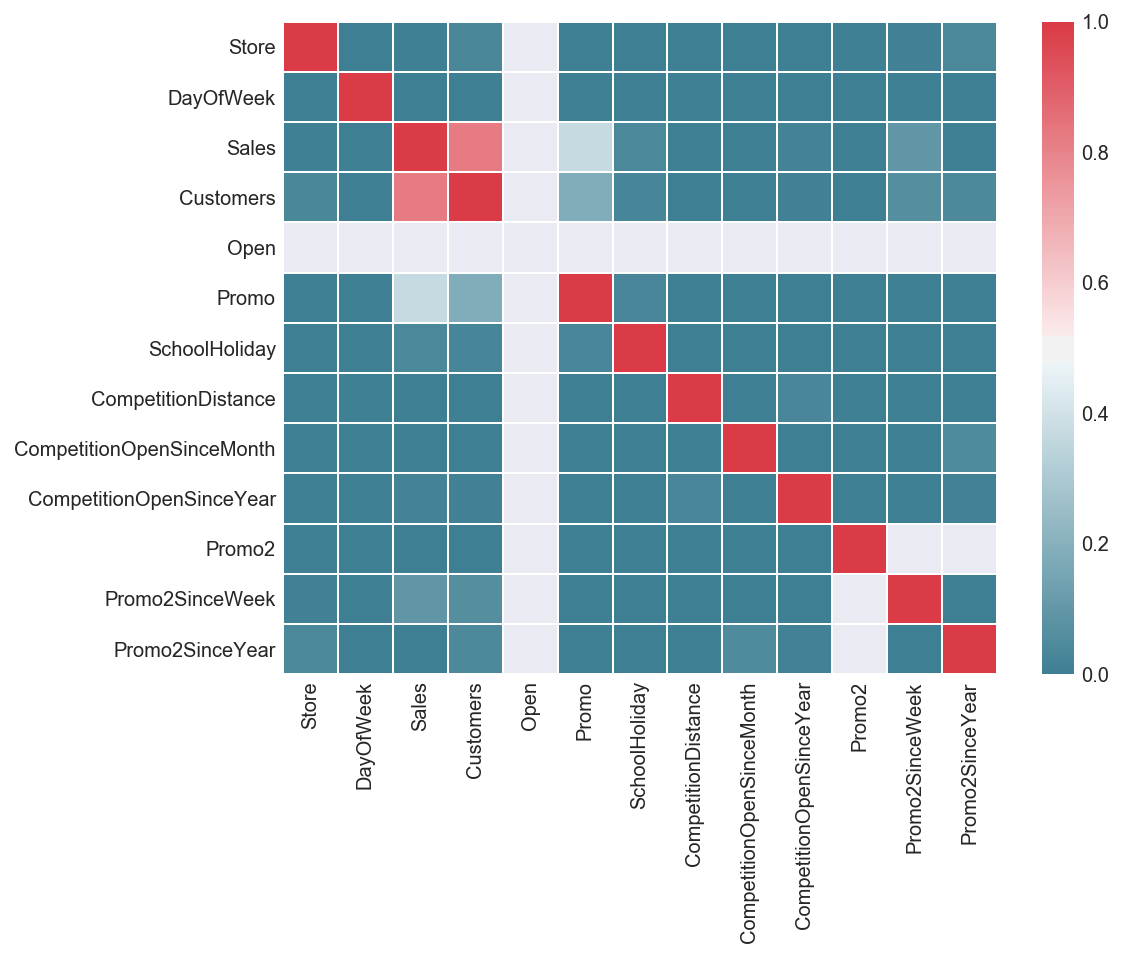

In [401]:
# Examine the correlation among different features.
plt.subplots(figsize=(8,6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train_store_open.corr(), vmin=0, vmax=1, cmap=cmap, linewidths=.5)

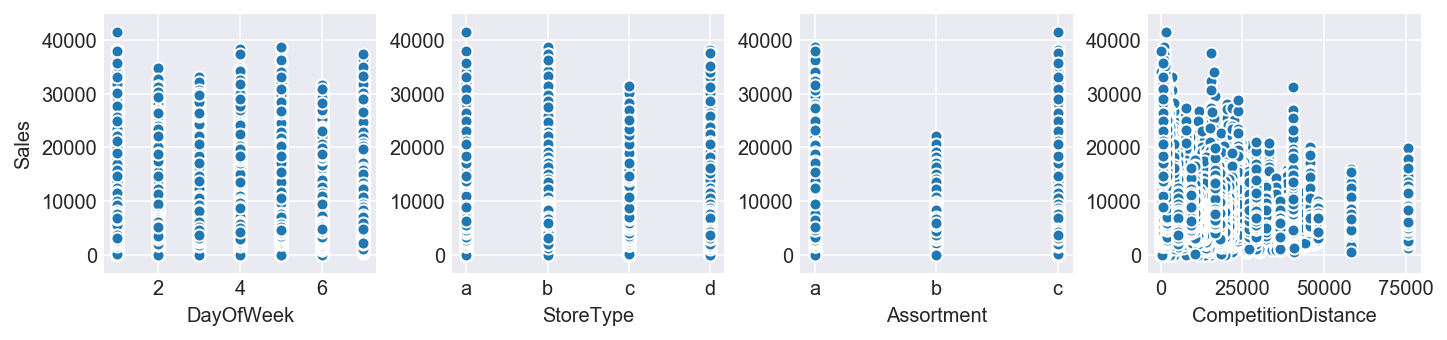

In [402]:
#Multiple scatterplots in Seaborn
sns.set_style('darkgrid')
feature_cols1=['DayOfWeek', 'StoreType', 'Assortment', 'CompetitionDistance']
sns.pairplot(train_store_open, x_vars=feature_cols1, y_vars='Sales', kind='scatter', palette="Set2")

-- A very clear relationship: the larger the number of customers, the higher the sales.

In general, possible good features include StoreType (categorical), Assortment(categorical), DayofWeek(categorical), SchoolHoliday(categorical), customers. However, the test dataset does not the variable customers, so we will not going to use it as a feature.

### Step 2: Run linear regression model to predict sales. -- Use  Decision Tree

### Model 1: Run null model

In [650]:
from sklearn import metrics
import numpy as np

train_null=train['Sales'].reset_index()
#train_null['y_mean']=train_null.Sales.mean()
train_null.head(3)

,index,Sales
0,0,5263
1,1,6064
2,2,8314


In [652]:
# Calculate the mean of target feature for null model
train_null.Sales.mean()

5773.818972305593

In [662]:
# calculate y mean
y_mean=5773.819
# create a column y_mean and fill with y mean value
train_null['y_mean']=5773.819
# calculate RMSE of Null model
np.sqrt(metrics.mean_squared_error(train_null.Sales, train_null.y_mean))

3849.9242828374627

-- RMSE value of baseline model (null model)

### Model 2:  Model using Decision Tree to run model: Use featuer 'Open'¶

In [404]:
# Select x=Open
feature_cols=['Open']
X=train_store[feature_cols]
y=train_store.Sales

#Instantiate a DecisionTreeRegressor (with randome_state)
treereg=DecisionTreeRegressor(random_state=1)
scores=cross_val_score(treereg, X, y, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

2828.6110513018698

### Model 3: Model using Decision Tree to run model: Use featuer 'DayofWeek'

In [405]:
# examine the type of the dataframe
type(train_store)

pandas.core.frame.DataFrame

In [406]:
# examine sales value on each weekday
train_store_open['DayOfWeek'].value_counts()

6    144058
2    143961
3    141936
5    138640
1    137560
4    134644
7      3593
Name: DayOfWeek, dtype: int64

In [407]:
# Encode DayofWeek: 1-6=0, 7=1
train_store_open['DayOfWeek_recode']=train_store_open.DayOfWeek.map(lambda x:0 if x==7 else 1)
train_store_open['DayOfWeek_recode'].value_counts()
#{'1':1, '2':1, '3':1, '4':1, '5':1, '6':1, '7':0}

/Users/fanghong/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1    840799
0      3593
Name: DayOfWeek_recode, dtype: int64

In [408]:
# Define X and y
feature_cols=['DayOfWeek_recode']
X=train_store_open[feature_cols]
y=train_store_open.Sales


# Split X and y into training and testing sets.
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=123)

#Instantiate a DecisionTreeRegressor (with randome_state)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
treereg=DecisionTreeRegressor(random_state=1)
scores=cross_val_score(treereg, X, y, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

3104.622123144798

### Model 4: Model using Decision Tree:  Use featuer 'Promo'

In [409]:
# Examine numbers of case with promo Vs no promo
train_store_open['Promo'].value_counts()

0    467496
1    376896
Name: Promo, dtype: int64

In [410]:
train_store_open.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek_recode
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1


In [411]:
# Define X and y
feature_cols=['Promo']
X=train_store_open[feature_cols]
y=train_store_open.Sales


# Split X and y into training and testing sets.
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=123)

#Instantiate a DecisionTreeRegressor (with randome_state)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
treereg=DecisionTreeRegressor(random_state=1)
scores=cross_val_score(treereg, X, y, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

2886.2638656432355

-- RMSE become smaller than null model and model 3.

### Model 5: Model using decision tree: use features 'StoreType'

In [412]:
train_store_open['StoreType'].value_counts()

a    457077
d    258774
c    112978
b     15563
Name: StoreType, dtype: int64

In [413]:
# Encode StoreType: 0 for type a, d, c,; 1 for type b
train_store_open['StoreType_recode']=train_store_open.StoreType.map(lambda x:1 if x=='b' else 0)
train_store_open['StoreType_recode'].value_counts()

/Users/fanghong/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    828829
1     15563
Name: StoreType_recode, dtype: int64

In [414]:
# select x=StoreType_recode
feature_cols=['StoreType_recode']
X=train_store_open[feature_cols]

#Instantiate a DecisionTreeRegressor (with randome_state)
treereg=DecisionTreeRegressor(random_state=1)
scores=cross_val_score(treereg, X, y, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

3074.0343353094845

### Model 6: Model using decision tree: use features 'StoreType' & 'Promo'

In [415]:
# select x 
feature_cols=['StoreType_recode','Promo']
X=train_store_open[feature_cols]

#Instantiate a DecisionTreeRegressor (with randome_state)
treereg=DecisionTreeRegressor(random_state=1)
scores=cross_val_score(treereg, X, y, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

2849.8675252629182

### Model 7: Model using decision tree: use feature "Assortment"

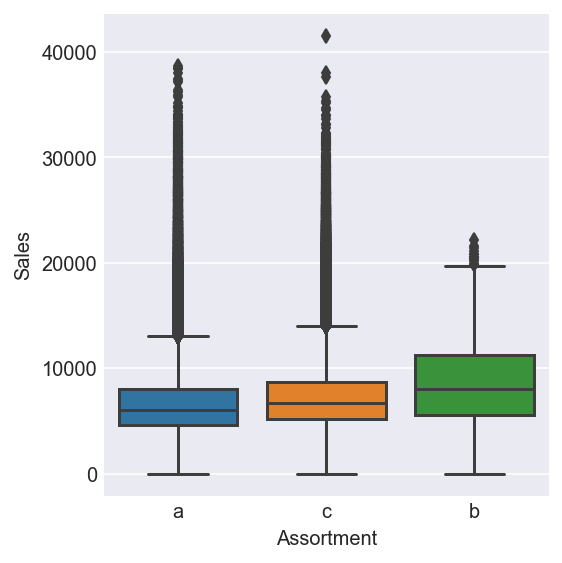

In [416]:
sns.factorplot(
    x='Assortment',
    y='Sales',
    data=train_store_open,
    kind='box',
)

- assortment a and c are more similar. 

In [417]:
# Recode assortment to : 1= a & c; 0=b
train_store_open['Assortment_recode']=train_store_open.Assortment.map(lambda x:1 if x=='b' else 0)

/Users/fanghong/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [418]:
train_store_open['Assortment_recode'].value_counts()

0    836180
1      8212
Name: Assortment_recode, dtype: int64

In [419]:
# select x
feature_cols=['Assortment_recode']
X=train_store_open[feature_cols]

#Instantiate a DecisionTreeRegressor (with randome_state)
treereg=DecisionTreeRegressor(random_state=1)
scores=cross_val_score(treereg, X, y, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

3102.4694225254739

-- Compared to null model with RMSE=3846.74, adding the feature "Assortment" does not reduce RMSE significantly.

### Tuning a Decision Tree-  Reduce the RMSE by tuning the max_depth parameter

In [420]:
# make X features
feature_cols=['StoreType_recode','Promo', 'Assortment_recode']
X=train_store_open[feature_cols]

In [421]:
# List of values to try:
max_depth_range = list(range(1,8))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use LOOCV with each value of max_depth.
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

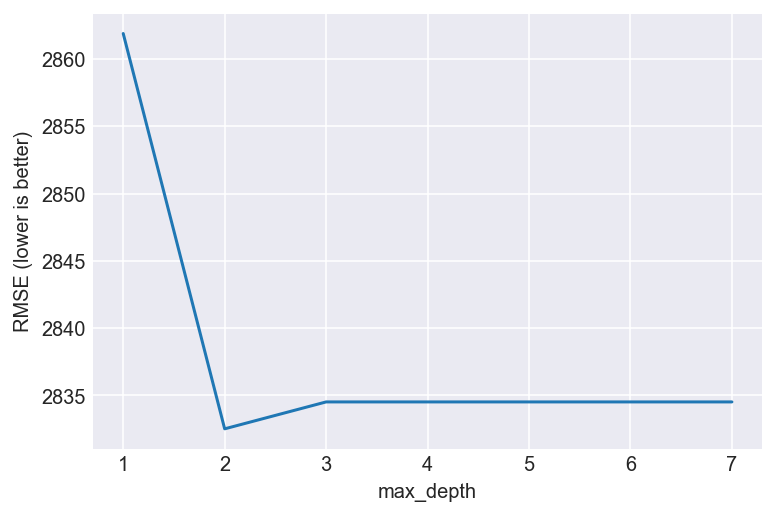

In [422]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [423]:
# Although max_depth=2 or 3 does not differ a lot, max_depth=3 was best, so fit a tree using that parameter.
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [424]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature.
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,StoreType_recode,0.139823
1,Promo,0.823505
2,Assortment_recode,0.036673


-- Thus, use feature "StoreType_recode", "Promo"; 'Assortment' is not a good feature. Model 6 is the best model by far (RMSE=3102)

### Model 8: Use train_test split with features "StoreType" &"Promo" to predict Sales

### Convert all categorical features.

In [492]:
train_store_open.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [493]:
# Write a function to convert categorical variables to multiple dummy variables
def get_dummy(df2, feature):
    df1=pd.get_dummies(df2[feature[0]], prefix=feature[0])# convert categorical variables to multiple dummy codetrain
    df1.drop(df1.columns[0], axis=1, inplace=True)# drop the first column
    df2=pd.concat([df1, df2], axis=1)# concatenate the orginal train_store dataframe and the dummy dataframe
    return df2


In [494]:
# create dummy value for DayOfWeek
train_store_get_dummy=get_dummy(train_store_open, ['DayOfWeek'])
train_store_get_dummy.head(5)

,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Store,DayOfWeek,Date,Sales,...,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,0,0,1,0,0,1,5,2015-07-31,5263,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,0,0,1,0,0,0,1,4,2015-07-30,5020,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,0,1,0,0,0,0,1,3,2015-07-29,4782,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,0,0,0,0,0,1,2,2015-07-28,5011,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,0,0,0,0,0,0,1,1,2015-07-27,6102,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [495]:
# Create dummy value for Promo
train_store_get_dummy=get_dummy(train_store_get_dummy, ['Promo'])
train_store_get_dummy.head(5)

,Promo_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Store,DayOfWeek,Date,...,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,0,0,0,1,0,0,1,5,2015-07-31,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,0,0,1,0,0,0,1,4,2015-07-30,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,0,1,0,0,0,0,1,3,2015-07-29,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,1,0,0,0,0,0,1,2,2015-07-28,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,0,0,0,0,0,0,1,1,2015-07-27,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [496]:
# Create dummy value for StoreType
train_store_get_dummy=get_dummy(train_store_get_dummy, ['StoreType'])
train_store_get_dummy.head(5)

,StoreType_b,StoreType_c,StoreType_d,Promo_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,...,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,0,1,0,0,0,1,0,0,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,0,1,0,1,0,0,1,0,0,0,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,0,1,0,1,0,1,0,0,0,0,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,0,1,0,1,1,0,0,0,0,0,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,0,1,0,1,0,0,0,0,0,0,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [507]:
# Examine the columns in train_store_get_dummy df
train_store_get_dummy.columns

Index([u'StoreType_b', u'StoreType_c', u'StoreType_d', u'Promo_1',
       u'DayOfWeek_2', u'DayOfWeek_3', u'DayOfWeek_4', u'DayOfWeek_5',
       u'DayOfWeek_6', u'DayOfWeek_7', u'Store', u'DayOfWeek', u'Date',
       u'Sales', u'Customers', u'Open', u'Promo', u'StateHoliday',
       u'SchoolHoliday', u'StoreType', u'Assortment', u'CompetitionDistance',
       u'CompetitionOpenSinceMonth', u'CompetitionOpenSinceYear', u'Promo2',
       u'Promo2SinceWeek', u'Promo2SinceYear', u'PromoInterval'],
      dtype='object')

### Run Multiple Linear Regression model with StoreType, Promo, DayOfWeek dummy variables. (No train_test split)

In [510]:
# Run the linear regression with dummy variables included
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

feature_cols=['StoreType_b', 'StoreType_c', 'StoreType_d', 'Promo_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7']

X=train_store_get_dummy[feature_cols]
y=train_store_get_dummy.Sales
lr.fit(X, y)
list(zip(feature_cols, lr.coef_))

[('StoreType_b', 3425.4775936237165),
 ('StoreType_c', 4.4451311768944421),
 ('StoreType_d', -102.08197281560004),
 ('Promo_1', 2286.0155838642931),
 ('DayOfWeek_2', -1066.7372782151999),
 ('DayOfWeek_3', -1431.0835061207054),
 ('DayOfWeek_4', -1425.277826737846),
 ('DayOfWeek_5', -1049.4303107974299),
 ('DayOfWeek_6', -1055.0410285692496),
 ('DayOfWeek_7', -788.13521216238996)]

In [511]:
# Use equation to predict y value
y_pred=lr.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_pred))

2807.6742680721445

-- RMSE of using linear regression = 2808, which is smaller than using decision tree (RMSE=3102).

### Run Multiple Linear Regression model with StoreType, Promo dummy variables: Using Train_test split

In [512]:
# Define a function that accepts a list of features and returns testing RMSE.
from sklearn.model_selection import train_test_split
def train_test_rmse(df, feature_cols):
    X = df[feature_cols]
    y = df.Sales
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [513]:
print(train_test_rmse(train_store_get_dummy_open, ['StoreType_b', 'StoreType_c', 'StoreType_d', 'Promo_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7' ]))

2811.52607843


-- BY using Train_test_split, RMSE is about the same as just running multiple regression (RMSE=2792) without using it.


In [514]:
# Run the train_test split with 30/70 split
def train_test_rmse(df, feature_cols):
    X = df[feature_cols]
    y = df.Sales
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [515]:
print(train_test_rmse(train_store_get_dummy_open, ['StoreType_b', 'StoreType_c', 'StoreType_d', 'Promo_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7']))

2810.62427081


### Run Multiple Linear Regression model with StoreType, Promo, DayofWeek, dummy variables: Using K-Folds  Cross-Validation and compare the results with Train_test split

In [518]:
feature_cols=['StoreType_b', 'StoreType_c', 'StoreType_d', 'Promo_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7']

X=train_store_get_dummy[feature_cols]
y=train_store_get_dummy.Sales


### K=5

In [519]:
#Split: K=5
from sklearn import model_selection
kf=model_selection.KFold(n_splits=5, shuffle=True)

In [520]:
# Write a function to calcuate RMSE, MSE, R2 for each models when K=5
mse_values = []
rmse_values=[]
scores = []
n = 0
print("~~~CROSS VALIDATION each fold~~~~")
for train_index, test_index in kf.split(X, y):
    lr=LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index]))))
    scores.append(lr.score(X, y))
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('RMSE: {}'.format(rmse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))
    
print("~~~summary of cross validation~~~")
print('Mean of MSE for all folds: {}').format(np.mean(mse_values))
print('Mean of R2 for all folds: {}').format(np.mean(scores))

~~~CROSS VALIDATION each fold~~~~
Model 1
MSE: 7902923.09571
RMSE: 2811.21381181
R2: 0.181928742752

Model 2
MSE: 7891589.17428
RMSE: 2809.19724731
R2: 0.181926362739

Model 3
MSE: 7881659.33252
RMSE: 2807.42931033
R2: 0.181928229492

Model 4
MSE: 7884108.61846
RMSE: 2807.86549152
R2: 0.181929512601

Model 5
MSE: 7855722.79511
RMSE: 2802.80623574
R2: 0.181927639977

~~~summary of cross validation~~~
Mean of MSE for all folds: 7883200.60322
Mean of R2 for all folds: 0.181928097512


--  RMSE were not different compared to linear model with and without using train_test split.

### K=4

In [521]:
kf=model_selection.KFold(n_splits=4, shuffle=True)

In [522]:
mse_values = []
rmse_values=[]
scores = []
n = 0
print("~~~CROSS VALIDATION each fold~~~~")
for train_index, test_index in kf.split(X, y):
    lr=LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index]))))
    scores.append(lr.score(X, y))
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('RMSE: {}'.format(rmse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))
    
print("~~~summary of cross validation~~~")
print('Mean of MSE for all folds: {}').format(np.mean(mse_values))
print('Mean of R2 for all folds: {}').format(np.mean(scores))

~~~CROSS VALIDATION each fold~~~~
Model 1
MSE: 7889028.89214
RMSE: 2808.74151394
R2: 0.181927004481

Model 2
MSE: 7846456.01342
RMSE: 2801.1526223
R2: 0.18192254832

Model 3
MSE: 7853490.62852
RMSE: 2802.40800536
R2: 0.181924195271

Model 4
MSE: 7944492.17574
RMSE: 2818.59755477
R2: 0.181926602818

~~~summary of cross validation~~~
Mean of MSE for all folds: 7883366.92745
Mean of R2 for all folds: 0.181925087722


-- model 4 of K=4 cross-validation produce by far the smallest RMSE

# Use this model to apply to test model and submit it to Kaggle

In [523]:
# Use function to convert categorical variables to multiple dummy variables
def get_dummy(df2, feature):
    df1=pd.get_dummies(df2[feature[0]], prefix=feature[0])# convert categorical variables to multiple dummy codetrain
    df2=pd.concat([df1, df2], axis=1)# concatenate the orginal train_store dataframe and the dummy dataframe
    return df2



In [538]:
#Merge test with store df
test_store=pd.merge(test, store, on='Store')
test_store.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [539]:
# select case that open=1
test_store_open=test_store[test_store.Open==1]



In [530]:
test_store_get_dummy=get_dummy(test_store_open, ['DayOfWeek'])
test_store_get_dummy.columns

Index([u'DayOfWeek_1', u'DayOfWeek_2', u'DayOfWeek_3', u'DayOfWeek_4',
       u'DayOfWeek_5', u'DayOfWeek_6', u'DayOfWeek_7', u'Id', u'Store',
       u'DayOfWeek', u'Date', u'Open', u'Promo', u'StateHoliday',
       u'SchoolHoliday', u'StoreType', u'Assortment', u'CompetitionDistance',
       u'CompetitionOpenSinceMonth', u'CompetitionOpenSinceYear', u'Promo2',
       u'Promo2SinceWeek', u'Promo2SinceYear', u'PromoInterval'],
      dtype='object')

In [531]:
test_store_get_dummy=get_dummy(test_store_get_dummy, ['StoreType'])
test_store_get_dummy.columns

Index([u'StoreType_a', u'StoreType_b', u'StoreType_c', u'StoreType_d',
       u'DayOfWeek_1', u'DayOfWeek_2', u'DayOfWeek_3', u'DayOfWeek_4',
       u'DayOfWeek_5', u'DayOfWeek_6', u'DayOfWeek_7', u'Id', u'Store',
       u'DayOfWeek', u'Date', u'Open', u'Promo', u'StateHoliday',
       u'SchoolHoliday', u'StoreType', u'Assortment', u'CompetitionDistance',
       u'CompetitionOpenSinceMonth', u'CompetitionOpenSinceYear', u'Promo2',
       u'Promo2SinceWeek', u'Promo2SinceYear', u'PromoInterval'],
      dtype='object')

In [532]:
test_store_get_dummy=get_dummy(test_store_get_dummy, ['Promo'])
test_store_get_dummy.columns

Index([u'Promo_0', u'Promo_1', u'StoreType_a', u'StoreType_b', u'StoreType_c',
       u'StoreType_d', u'DayOfWeek_1', u'DayOfWeek_2', u'DayOfWeek_3',
       u'DayOfWeek_4', u'DayOfWeek_5', u'DayOfWeek_6', u'DayOfWeek_7', u'Id',
       u'Store', u'DayOfWeek', u'Date', u'Open', u'Promo', u'StateHoliday',
       u'SchoolHoliday', u'StoreType', u'Assortment', u'CompetitionDistance',
       u'CompetitionOpenSinceMonth', u'CompetitionOpenSinceYear', u'Promo2',
       u'Promo2SinceWeek', u'Promo2SinceYear', u'PromoInterval'],
      dtype='object')

### Use K=4 to predict sales in test_store_get_dummy_open dataset


In [560]:
# Run the model with train dataset again
feature_cols=['StoreType_b', 'StoreType_c', 'StoreType_d', 'Promo_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7']

X=train_store_get_dummy[feature_cols]
y=train_store_get_dummy.Sales

In [561]:
train_store_get_dummy.columns

Index([u'Promo_0', u'Promo_1', u'StoreType_a', u'StoreType_b', u'StoreType_c',
       u'StoreType_d', u'DayOfWeek_1', u'DayOfWeek_2', u'DayOfWeek_3',
       u'DayOfWeek_4', u'DayOfWeek_5', u'DayOfWeek_6', u'DayOfWeek_7',
       u'Store', u'DayOfWeek', u'Date', u'Sales', u'Customers', u'Open',
       u'Promo', u'StateHoliday', u'SchoolHoliday', u'StoreType',
       u'Assortment', u'CompetitionDistance', u'CompetitionOpenSinceMonth',
       u'CompetitionOpenSinceYear', u'Promo2', u'Promo2SinceWeek',
       u'Promo2SinceYear', u'PromoInterval'],
      dtype='object')

In [562]:
X.shape


(844392, 10)

In [563]:
mse_values = []
rmse_values=[]
scores = []
n = 0
print("~~~CROSS VALIDATION each fold~~~~")
for train_index, test_index in kf.split(X, y):
    X.fillna(X.mean(), inplace=True)
    y.fillna(y.mean(), inplace=True)
    lr=LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index]))))
    scores.append(lr.score(X, y))
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('RMSE: {}'.format(rmse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))
    
print("~~~summary of cross validation~~~")
print('Mean of MSE for all folds: {}').format(np.mean(mse_values))
print('Mean of R2 for all folds: {}').format(np.mean(scores))

~~~CROSS VALIDATION each fold~~~~
Model 1
MSE: 7911115.47462
RMSE: 2812.67052365
R2: 0.18192809893

Model 2
MSE: 7807405.84513
RMSE: 2794.17355315
R2: 0.181925842452

Model 3
MSE: 7909830.70293
RMSE: 2812.44212437
R2: 0.181927761217

Model 4
MSE: 7904494.3442
RMSE: 2811.49325879
R2: 0.181927857735

~~~summary of cross validation~~~
Mean of MSE for all folds: 7883211.59172
Mean of R2 for all folds: 0.181927390083


In [564]:
# fit the model
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [565]:
# set the x value with data from test df
feature_cols=['StoreType_b', 'StoreType_c', 'StoreType_d', 'Promo_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7']
X=test_store_get_dummy[feature_cols]
X.fillna(X.mean(), inplace=True)

,StoreType_b,StoreType_c,StoreType_d,Promo_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,0,1,0,1,0,0,1,0,0,0
1,0,1,0,1,0,1,0,0,0,0
2,0,1,0,1,1,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,1,0,0
7,0,1,0,0,0,0,1,0,0,0
8,0,1,0,0,0,1,0,0,0,0
9,0,1,0,0,1,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0


In [566]:
list(zip(feature_cols, lr.coef_))

[('StoreType_b', 3425.4775936237165),
 ('StoreType_c', 4.4451311768944421),
 ('StoreType_d', -102.08197281560004),
 ('Promo_1', 2286.0155838642931),
 ('DayOfWeek_2', -1066.7372782151999),
 ('DayOfWeek_3', -1431.0835061207054),
 ('DayOfWeek_4', -1425.277826737846),
 ('DayOfWeek_5', -1049.4303107974299),
 ('DayOfWeek_6', -1055.0410285692496),
 ('DayOfWeek_7', -788.13521216238996)]

In [567]:
# Predict sales value in test_store_get_dummy
test_y_pred=lr.predict(X)
test_y_pred

array([ 7773.23219983,  7767.42652044,  8131.77274835, ...,  8025.24564436,
        9091.98292257,  5750.92631014])

In [568]:
columns_name=['Sales']
predicted_sales=pd.DataFrame(test_y_pred[0:], columns=columns_name)
predicted_sales.head(5)
predicted_sales['Sales'].isnull().value_counts()

False    35093
Name: Sales, dtype: int64

In [569]:
l1=predicted_sales.values.tolist()
l2=test_store_get_dummy.values.tolist()
for i in range(len(l1)):
    l1[i].extend(l2[i])
    
subform1=pd.DataFrame(l1, columns=predicted_sales.columns.tolist()+test_store_get_dummy.columns.tolist())

In [570]:
subform1['Sales'].isnull().value_counts()

False    35093
Name: Sales, dtype: int64

In [571]:
subform2=subform1[['Id', 'Sales']]
subform2.head(5)

,Id,Sales
0,1,7773.232200
1,857,7767.426520
2,1713,8131.772748
3,2569,9198.510027
4,4281,5857.453414


In [572]:
subform3=test.join(subform2.set_index('Id'), on='Id')
subform3.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Sales
0,1,1,4,2015-09-17,1.0,1,0,0,7773.232200
1,2,3,4,2015-09-17,1.0,1,0,0,7768.787069
2,3,7,4,2015-09-17,1.0,1,0,0,7768.787069
3,4,8,4,2015-09-17,1.0,1,0,0,7768.787069
4,5,9,4,2015-09-17,1.0,1,0,0,7768.787069
5,6,10,4,2015-09-17,1.0,1,0,0,7768.787069
6,7,11,4,2015-09-17,1.0,1,0,0,7768.787069
7,8,12,4,2015-09-17,1.0,1,0,0,7768.787069
8,9,13,4,2015-09-17,1.0,1,0,0,7666.705096
9,10,14,4,2015-09-17,1.0,1,0,0,7768.787069


In [573]:
# check the null values
subform3['Sales'].isnull().value_counts()

False    35093
True      5995
Name: Sales, dtype: int64

In [574]:
#replace null with 0
subform4=subform3.fillna(0)
subform4['Sales'].isnull().value_counts()

False    41088
Name: Sales, dtype: int64

In [577]:
# select only Id and Sales and convert it to CSV file
subform5=subform4[['Id', 'Sales']]
subform5.to_csv('Rossmann_Sales_Prediction_Model7', index=False)

## Step 2: Using Continous Variables to Predict Sales


### Model 8: Use continous feature 'CompetitionDistance' to Predict Sales (Open=1): train_test split

In [608]:
# Used merged df train_store and select cases when open=1
train_store_get_dummy.head(3)

,Promo_0,Promo_1,StoreType_a,StoreType_b,StoreType_c,StoreType_d,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,...,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,0,0,1,0,0,0,0,0,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,0,1,0,0,1,0,0,0,0,1,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,0,1,0,0,1,0,0,0,1,0,...,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [609]:
# check if the feature constain any null values
train_store_get_dummy['CompetitionDistance'].isnull().sum()


2186

In [610]:
# select feature x and y
feature_cols=['CompetitionDistance']

X=train_store_get_dummy[feature_cols]
y=train_store_get_dummy.Sales

In [611]:
# Since features contains null values, we fill the null values with its mean value
from sklearn.model_selection import train_test_split
def train_test_rmse(df, feature_cols):
    X = df[feature_cols]
    y = df.Sales
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    X_test.fillna(X_test.mean(), inplace=True) # missing value fills with mean value
    y_test.fillna(y_test.mean(), inplace=True) # missing value fills with mean value
    X_train.fillna(X_train.mean(), inplace=True)
    y_train.fillna(y_train.mean(), inplace=True)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [612]:
# RMSE when Use CompetitionDistance to predict sales when Open=1
print(train_test_rmse(train_store_get_dummy, ['CompetitionDistance']))

3109.85004684


In [613]:
# RMSE when Use CompetitionDistance to predict sales when we do not separate open =1 & 0, RMSE is way much larger. 
print(train_test_rmse(train_store, ['CompetitionDistance']))

3846.30730187


### Model 9: Use continous feature 'CompetitionDistance' to Predict Sales: K-fold cross-validation

### K=5

In [614]:
kf=model_selection.KFold(n_splits=5, shuffle=True)
mse_values = []
rmse_values=[]
scores = []
n = 0
print("~~~CROSS VALIDATION each fold~~~~")
for train_index, test_index in kf.split(X, y):
    X.fillna(X.mean(), inplace=True)
    y.fillna(y.mean(), inplace=True)
    lr=LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index]))))
    scores.append(lr.score(X, y))
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('RMSE: {}'.format(rmse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))
    
print("~~~summary of cross validation~~~")
print('Mean of MSE for all folds: {}').format(np.mean(mse_values))
print('Mean of R2 for all folds: {}').format(np.mean(scores))

~~~CROSS VALIDATION each fold~~~~
Model 1
MSE: 9741839.78279
RMSE: 3121.19204516
R2: 0.00131888845646

Model 2
MSE: 9570369.82204
RMSE: 3093.60143232
R2: 0.00132104361472

Model 3
MSE: 9604458.15808
RMSE: 3099.10602563
R2: 0.00132046761452

Model 4
MSE: 9663143.1314
RMSE: 3108.55965544
R2: 0.00132134030651

Model 5
MSE: 9537623.83131
RMSE: 3088.30436183
R2: 0.0013207294418

~~~summary of cross validation~~~
Mean of MSE for all folds: 9623486.94513
Mean of R2 for all folds: 0.0013204938868


### K=3

In [589]:
kf=model_selection.KFold(n_splits=3, shuffle=True)
mse_values = []
rmse_values=[]
scores = []
n = 0
print("~~~CROSS VALIDATION each fold~~~~")
for train_index, test_index in kf.split(X, y):
    X.fillna(X.mean(), inplace=True)
    y.fillna(y.mean(), inplace=True)
    lr=LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index]))))
    scores.append(lr.score(X, y))
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('RMSE: {}'.format(rmse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))
    
print("~~~summary of cross validation~~~")
print('Mean of MSE for all folds: {}').format(np.mean(mse_values))
print('Mean of R2 for all folds: {}').format(np.mean(scores))

~~~CROSS VALIDATION each fold~~~~
Model 1
MSE: 9677370.18666
RMSE: 3110.8471815
R2: 0.00132012837274

Model 2
MSE: 9580343.692
RMSE: 3095.21302853
R2: 0.00131853474759

Model 3
MSE: 9612767.72563
RMSE: 3100.44637522
R2: 0.00132008621265

~~~summary of cross validation~~~
Mean of MSE for all folds: 9623493.8681
Mean of R2 for all folds: 0.00131958311099


-- whether using train_test split or using K-folds does not reduce RMSE significantly.

### Model 10: Using continous features CompetitionDistance, and categorical features Promo, DayOfWeek, StoreType to predict Sales (Linear regression): Open =1 data

In [619]:
# Make X and y
feature_cols=['CompetitionDistance', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'Promo_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7']

X=train_store_get_dummy[feature_cols]
y=train_store_get_dummy.Sales

In [620]:
kf=model_selection.KFold(n_splits=5, shuffle=True)
mse_values = []
rmse_values=[]
scores = []
n = 0
print("~~~CROSS VALIDATION each fold~~~~")
for train_index, test_index in kf.split(X, y):
    X.fillna(X.mean(), inplace=True)
    y.fillna(y.mean(), inplace=True)
    lr=LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index]))))
    scores.append(lr.score(X, y))
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('RMSE: {}'.format(rmse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))
    
print("~~~summary of cross validation~~~")
print('Mean of MSE for all folds: {}').format(np.mean(mse_values))
print('Mean of R2 for all folds: {}').format(np.mean(scores))

~~~CROSS VALIDATION each fold~~~~
Model 1
MSE: 7932260.13152
RMSE: 2816.42683759
R2: 0.182438034969

Model 2
MSE: 7871936.50419
RMSE: 2805.69715119
R2: 0.182439495079

Model 3
MSE: 7870577.58827
RMSE: 2805.45496992
R2: 0.182436388284

Model 4
MSE: 7860959.58527
RMSE: 2803.74028492
R2: 0.182438254661

Model 5
MSE: 7856610.08275
RMSE: 2802.96451686
R2: 0.182437228924

~~~summary of cross validation~~~
Mean of MSE for all folds: 7878468.7784
Mean of R2 for all folds: 0.182437880383


### Convert it CSV and submit to Kaggle

In [621]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [622]:
test_store_get_dummy.columns

Index([u'Promo_0', u'Promo_1', u'StoreType_a', u'StoreType_b', u'StoreType_c',
       u'StoreType_d', u'DayOfWeek_1', u'DayOfWeek_2', u'DayOfWeek_3',
       u'DayOfWeek_4', u'DayOfWeek_5', u'DayOfWeek_6', u'DayOfWeek_7', u'Id',
       u'Store', u'DayOfWeek', u'Date', u'Open', u'Promo', u'StateHoliday',
       u'SchoolHoliday', u'StoreType', u'Assortment', u'CompetitionDistance',
       u'CompetitionOpenSinceMonth', u'CompetitionOpenSinceYear', u'Promo2',
       u'Promo2SinceWeek', u'Promo2SinceYear', u'PromoInterval'],
      dtype='object')

In [625]:
# set the x value with data from test df
feature_cols=['CompetitionDistance', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'Promo_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7']
test_store_get_dummy2['CompetitionDistance'].fillna(test_store_get_dummy2['CompetitionDistance'].mean(), inplace=True) # fill the none value with mean
test_store_get_dummy2=test_store_get_dummy
X=test_store_get_dummy[feature_cols]



In [626]:
test_y_pred=lr.predict(X)

In [627]:
columns_name=['Sales']
predicted_sales=pd.DataFrame(test_y_pred[0:], columns=columns_name)
predicted_sales.head(5)
predicted_sales['Sales'].isnull().value_counts()

False    35093
Name: Sales, dtype: int64

In [628]:
l1=predicted_sales.values.tolist()
l2=test_store_get_dummy11.values.tolist()
for i in range(len(l1)):
    l1[i].extend(l2[i])
    
subform1=pd.DataFrame(l1, columns=predicted_sales.columns.tolist()+test_store_get_dummy11.columns.tolist())

In [629]:
subform2=subform1[['Id', 'Sales']]
subform3=test.join(subform2.set_index('Id'), on='Id')
subform3['Sales'].isnull().value_counts()
subform4=subform3[['Id', 'Sales']]
subform4.to_csv('Rossmann_Sales_Prediction_Model9', index=False)

## Kaggle Score=0.433, did not reduce a lot. Thus, separate file to open =1 and then merge it is better than not spliting it.

### Model 12: Examine the feature of time

In [635]:
from datetime import datetime
train_store_open['Date']=pd.to_datetime(train_store_open.Date)
train_store_open.head(3)

/Users/fanghong/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


# random forest regressor
# Lasso (try this)
# volatility forecasts (ARMA, ARCH, GARCH): check out what is it

# Convert file to a CSV file 